# Traitement automatique des données Poids (Withings HealthMate),
# Food (MyFitnessPal), et Exercices (Polar)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

In [31]:
# ici, aller chercher dans Download
# les fichiers commençant par data-user... , data_BEN..., etc.
# repérer les plus récents (= derniers downloads)
# et copier ces plus récents dans imports avec le nom qui va bien

# voir :
# os.listdir : liste fichiers
# os.stat_result : donne infos sur fichier x (dont date dernière modif)
# shutil.copy : copie fichier endroit X à l'endroit Y

downloads_rep = "/home/benjamin/Downloads/"
liste_downloaded_files = os.listdir(downloads_rep)

if len(liste_downloaded_files) == 0:
    raise NameError(f"Aucun fichier n'est présent dans {downloads_rep}")

In [32]:
# recherche fichiers POIDS : format data_BEN_xxxxxx.zip

# Source : Withings https://healthmate.withings.com/

# Account > User > Parameters > Download ==> data_BEN_xxxxx.zip ==> contient weight.csv

pattern_poids = "^data_BEN_[\d]+[.]zip"
eng = re.compile(pattern_poids)
liste_zip_poids = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un data_BEN_dddd.zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_poids.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_poids) == 0:
    raise NameError(f'Aucun fichier de type data_BEN_xxxx.zip contenant \
        les données poids ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_poids)

idx = np.argmax(liste_mtime_zips)
filename_poids = liste_zip_poids[idx]

print(f"Le fichier poids le plus récent est : {filename_poids}, parmi :\n")
for f in liste_zip_poids:
    print(f"{f}")

Le fichier poids le plus récent est : data_BEN_1703233852.zip, parmi :

data_BEN_1702965286.zip
data_BEN_1702711412.zip
data_BEN_1702794370.zip
data_BEN_1703048647.zip
data_BEN_1702878104.zip
data_BEN_1703233852.zip
data_BEN_1703130811.zip


In [33]:
# recherche fichiers FOOD : format File-Export-YYYY-MM-DD-to-YYYY-MM-DD.zip

# https://www.myfitnesspal.com/reports

# www.myfitnesspal.com ==> reports > export data ==> File-Export-date1-to-date2.zip

pattern_food = "^File-Export-[\d]{4}-[\d]{2}-[\d]{2}-to-[\d]{4}-[\d]{2}-[\d]{2}.*[.]zip"
eng = re.compile(pattern_food)
liste_zip_food = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un File-Export-....zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_food.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_food) == 0:
    raise NameError(f'Aucun fichier de type File-Export-xxxx.zip contenant \
        les données food ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_food)

idx = np.argmax(liste_mtime_zips)
filename_food = liste_zip_food[idx]

print(f"Le fichier food le plus récent est : {filename_food}, parmi \n")

for f in liste_zip_food:
    print(f"{f}")

Le fichier food le plus récent est : File-Export-2020-08-03-to-2023-12-22.zip, parmi 

File-Export-2020-08-03-to-2023-12-18.zip
File-Export-2020-08-03-to-2023-12-20.zip
File-Export-2020-08-03-to-2023-12-16.zip
File-Export-2020-08-03-to-2023-12-19.zip
File-Export-2020-08-03-to-2023-12-17.zip
File-Export-2020-08-03-to-2023-12-22.zip
File-Export-2020-08-03-to-2023-12-21.zip


In [34]:
# recherche fichiers EXO par POLAR : format polar-user-data-export.zip

# https://account.polar.com/#export ==> polar-user-data-export-xxxxx.zip

pattern_polar = "^polar-user-data-export_.+[.]zip"
eng = re.compile(pattern_polar)
liste_zip_polar = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un polar-user-data-export_....zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_polar.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_polar) == 0:
    raise NameError(f'Aucun fichier de type polar-user-data-export_xxxx.zip contenant \
        les données exercices de Polar ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_polar)

idx = np.argmax(liste_mtime_zips)
filename_polar = liste_zip_polar[idx]

print(f"Le fichier exercices le plus récent est : {filename_polar}, parmi :\n")

for f in liste_zip_polar:
    print(f"{f}")

Le fichier exercices le plus récent est : polar-user-data-export_872b7f7c-c5e0-4b44-b031-f8e8821babae.zip, parmi :

polar-user-data-export_872b7f7c-c5e0-4b44-b031-f8e8821babae.zip
polar-user-data-export_bbe57720-9ba0-43e3-945d-43779857dfa9.zip


In [35]:
# copie les trois fichiers sélectionnés dans le répertoire de travail

import_pathname = '/home/benjamin/Folders_Python/Weight_imports/'

src = [filename_food,
       filename_poids,
       filename_polar]

dst = ['food', 'poids', 'polar']

for s,d in zip(src, dst):
       shutil.copy(downloads_rep + s, import_pathname + d)
       
print(f"Utilise : {filename_food}, {filename_poids}, {filename_polar}")

Utilise : File-Export-2020-08-03-to-2023-12-22.zip, data_BEN_1703233852.zip, polar-user-data-export_872b7f7c-c5e0-4b44-b031-f8e8821babae.zip


In [36]:
# Récupère données POIDS

withings_filename = import_pathname + 'poids'  # fichier zip le plus récent de HealthMate Withings

with ZipFile(withings_filename, 'r') as weight_zip:
    weight_csv = weight_zip.extract('weight.csv', path=import_pathname)

# extrait la dataframe poids ----------------

colnames = ['Date', 'Poids (kg)', 'Gras (kg)', 'Masse osseuse (kg)', 'Masse musculaire (kg)', 'Hydratation (kg)']

df_weight = pd.read_csv(weight_csv, usecols=colnames)

os.remove(weight_csv)

df_weight.rename(columns = {'Poids (kg)' : 'Masse_Totale' , 
                            'Gras (kg)' : 'Masse_Grasse',
                            'Masse osseuse (kg)' : 'Masse_Osseuse',
                            'Masse musculaire (kg)' : 'Masse_Musculaire',
                            'Hydratation (kg)' : 'Masse_Hydrique'
                            }, 
                 inplace=True)

# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d %H:%M:%S'

df_weight['Date'] = df_weight['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_weight = df_weight.groupby('Date').mean()

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_weight = df_weight[df_weight.index >= start_date]

subset = ['Masse_Totale', 'Masse_Grasse']
df_weight.dropna(subset = subset, inplace=True)

# df_weight['Masse_Maigre'] = df_weight['Masse_Totale'] - df_weight['Masse_Grasse']
df_weight['MG%'] = df_weight['Masse_Grasse'] / df_weight['Masse_Totale']
df_weight['BMR'] = 370 + 21.6 * (df_weight['Masse_Totale'] - df_weight['Masse_Grasse'])

df_weight.sort_index(inplace=True)

In [37]:
# forward propagate actual values into NaN
df_weight.fillna(method="ffill", inplace=True)

In [38]:
df_weight.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2023-12-08,70.765455,11.520909,2.962727,56.264545,39.486364,0.162804,1649.682182
2023-12-09,72.284545,11.750909,3.027273,57.490000,40.686364,0.162565,1677.526545
2023-12-10,71.904167,11.821667,3.003333,57.060000,40.234167,0.164409,1667.782000
2023-12-11,72.053000,12.060000,2.999000,56.981000,40.106000,0.167377,1665.848800
2023-12-12,71.931818,11.891818,3.001818,57.021818,40.182727,0.165321,1666.864000
2023-12-13,71.302500,11.513333,2.989167,56.781667,40.017500,0.161472,1661.446000
2023-12-14,71.490000,10.782727,3.045455,57.647273,41.139091,0.150828,1681.277091
2023-12-15,71.485000,10.910000,3.037000,57.523000,40.962000,0.152619,1678.420000
2023-12-16,70.810000,11.339000,2.975000,56.479000,39.745000,0.160133,1654.573600


In [39]:
df_weight.rolling(window=7).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2023-12-08,71.258831,11.626442,2.982078,56.633714,39.843506,0.163157,1658.059616
2023-12-09,71.472481,11.642286,2.991974,56.822143,40.031558,0.162890,1662.332208
2023-12-10,71.568504,11.720524,2.992450,56.839143,40.030868,0.163767,1662.716379
2023-12-11,71.618790,11.771810,2.992307,56.838857,40.020154,0.164365,1662.694779
2023-12-12,71.741387,11.806615,2.996723,56.922234,40.097816,0.164569,1664.591091
2023-12-13,71.673459,11.774091,2.994890,56.888043,40.070316,0.164269,1663.826348
2023-12-14,71.675926,11.620195,3.004110,57.035186,40.264602,0.162111,1667.203803
2023-12-15,71.778719,11.532922,3.014721,57.214965,40.475407,0.160656,1671.309205
2023-12-16,71.568069,11.474078,3.007253,57.070537,40.340926,0.160308,1668.030213


In [40]:
# Récupère données FOOD

mfp_filename = import_pathname + "food" # données de My Fitness Pal

# Extrait les archives
    
with ZipFile(mfp_filename, 'r') as food_zip:
    output_dir = food_zip.namelist()
    target = 'Nutrition-Summary'
    for l in output_dir:
        if l[:len(target)] == target:
            food_csv = food_zip.extract(l, path=import_pathname)
            break
        
# extrait la dataframe food -------------------------------

colnames = ['Date', 'Meal', 'Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)']

df_food = pd.read_csv(food_csv, usecols=colnames)
os.remove(food_csv)

df_food.rename(columns = {'Fat (g)' : 'Lipides' , 'Carbohydrates (g)' : 'Glucides', 'Protein (g)' : 'Proteines'}, inplace=True)

In [41]:
# df_food.tail(15)

In [42]:
# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d'

df_food['Date'] = df_food['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_food = df_food.groupby('Date').sum(numeric_only=True)

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_food = df_food[df_food.index >= start_date]
df_food.dropna(inplace=True)
df_food.sort_index(inplace=True)

In [43]:
df_food.tail(15)

,Calories,Lipides,Glucides,Proteines
Date,,,,
2023-12-07,1796.1,40.5,128.5,233.9
2023-12-08,1813.7,50.8,176.5,166.7
2023-12-09,3355.5,96.9,442.8,188.9
2023-12-10,1491.4,29.5,179.9,134.1
2023-12-11,1551.5,19.4,141.5,204.5
2023-12-12,1815.4,42.1,185.0,181.5
2023-12-13,1794.8,47.5,211.7,126.7
2023-12-14,1809.1,60.4,176.6,128.4
2023-12-15,1779.5,64.7,92.8,211.9


In [44]:
MAX_CAL = 1600.0
n_jours = 3
target = (MAX_CAL*7 - df_food['Calories'][-4:].sum())/n_jours
avg = df_food['Calories'][-7:].mean()

print(f'Moyenne 7 derniers jours = {avg:.0f} kcals/jour')
print(f'Target quotidienne sur les {n_jours} prochains jours pour tenir {MAX_CAL} hebdomadaire = {target:.0f} kcals/jour')

Moyenne 7 derniers jours = 2054 kcals/jour
Target quotidienne sur les 3 prochains jours pour tenir 1600.0 hebdomadaire = 1225 kcals/jour


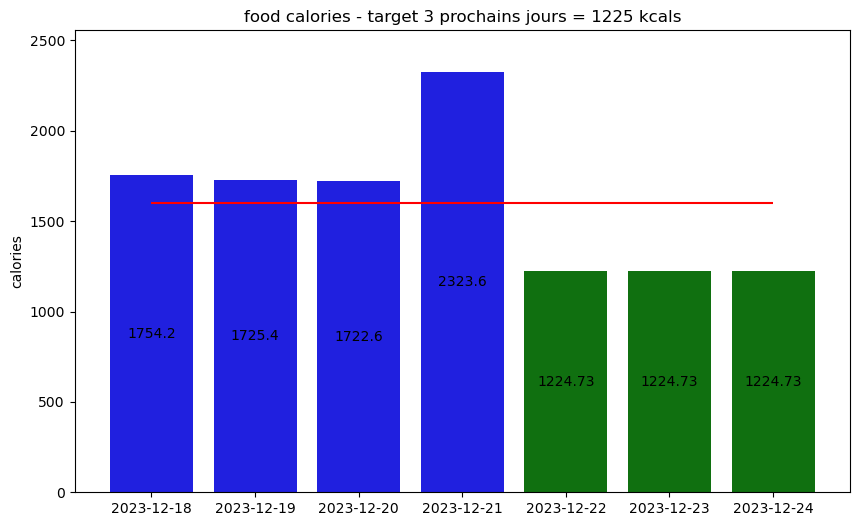

In [45]:
# plot data
fig, ax = plt.subplots(figsize=(10, 6))

tick_label = list(df_food.index[-4:]) + [ df_food.index[-1] + datetime.timedelta(days=d) for d in range(1,4 )]
listcals = list(df_food['Calories'][-4:]) + [ target ] * n_jours

colors = [ 'blue'] * 4 + ['green'] * 3
sns.barplot(x=tick_label, y=listcals, ax=ax, palette=colors)

# annotate
ax.bar_label(ax.containers[0], label_type='center')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

ax.set_ylabel('calories')
ax.set_title(f'food calories - target 3 prochains jours = {target:.0f} kcals')

ax.hlines(y=MAX_CAL, xmin=0, xmax=6, colors=['red'])

plt.show()

In [46]:
# df_food.rolling(window=7).mean().tail(15)

In [47]:
def extract_data_training(exo_dict):
    # utility fonction pour récupérer : date, durée, type exercice et calories dépensées
    
    # récupère date
    pattern = '2(\d){3,3}-(\d){2,2}-(\d){2,2}'  # on cherche une date du type 2xxx-yy-zz
    p = re.compile(pattern)
    m = p.search(exo_dict.get('startTime'))
    if m: 
        time_format = '%Y-%m-%d'
        exo_date = datetime.datetime.strptime( exo_dict.get('startTime')[:10], time_format ).date()
    
    # récupère durée
    pattern = '(\d)+[.]?(\d)*'  # on cherche une durée du type xxxx.yyyy
    p = re.compile(pattern)
    m = p.search(exo_dict.get('duration'))
    if m:
        exo_duration = float(m.group())
    
    # récupère type activité et calories dépensées
    d = exo_dict.get('exercises')[0]   
    exo_type = d.get('sport')
    if d.get('kiloCalories'):
        exo_cals = float(d.get('kiloCalories'))
    else:
        exo_cals = 0.0
    
    return exo_date, exo_duration, exo_type, exo_cals

In [48]:
# Récupère les données EXERCICE

polar_filename = import_pathname + "polar"  # données de Polar

with ZipFile(polar_filename, 'r') as polar_zip:
    output_dir = polar_zip.namelist()
    
    target = 'training-session'
    dict_all_exos = {}
    for i, enr_name in enumerate(tqdm(output_dir)): # on parcourt la liste des archives
        if enr_name[:len(target)] == target:  # si c'est un enregistrement d'une session de training, on traite
            enr_json = polar_zip.extract(enr_name, path=import_pathname)   # extraction du json
            with open(enr_json, 'r') as f:
                exo_dict = json.load(f)
                exo_date, exo_duration, exo_type, exo_cals = extract_data_training(exo_dict)
                if dict_all_exos.get(exo_date) == None:
                    dict_all_exos[exo_date] = [ exo_duration, exo_cals]
                else:
                    dict_all_exos[exo_date] = [ dict_all_exos[exo_date][0] + exo_duration, dict_all_exos[exo_date][1] + exo_cals ]
                # print(f'exercice {i+1} : date = {exo_date}, durée = {exo_duration}, type = {exo_type}, cals = {exo_cals}')
            os.remove(enr_json)
    
    df_exos = pd.DataFrame.from_dict(dict_all_exos, orient='index', columns=['exo_duree', 'exo_cals_bruts']).sort_index()

100%|██████████| 1789/1789 [00:57<00:00, 30.90it/s]


In [49]:
df_exos.tail(15)

,exo_duree,exo_cals_bruts
2023-11-27,3780.702,360.0
2023-11-29,3540.595,336.0
2023-11-30,1861.157,274.0
2023-12-01,3120.704,263.0
2023-12-03,5892.579,528.0
2023-12-05,3540.597,271.0
2023-12-06,1940.959,286.0
2023-12-07,1980.953,308.0
2023-12-08,3120.828,274.0
2023-12-10,5700.705,538.0


In [76]:
# Ajout à la main des exos depuis le xx Janvier inclus pour palier à la fréquence de rafraîchissement de l'extraction Polar

# récupère fichier brut .csv
exos_persos_filename = "/home/benjamin/Folders_Python/Weight_imports/Exos_Persos.csv"
df_exos_persos = pd.read_csv(exos_persos_filename)

# convertit la colonne Jour en datetime objects en colonne Date
pattern_date = '[\d]{2}/[\d]{2}/[\d]{2}'
p = re.compile(pattern_date)

day_format = "%d/%m/%y"

df_exos_persos['Date'] = df_exos_persos['Jour'].apply( lambda x : datetime.datetime.strptime(p.search(x).group(0), day_format).date() )

# drope la colonne Jour, somme tous les exercices par date
df_exos_persos.drop(columns=['Jour'], inplace=True)

df_exos_persos = df_exos_persos.groupby('Date').sum()

# met au bon format la duree de l'exercice (minutes => secondes)
df_exos_persos['exo_duree'] = df_exos_persos['Duree'] * 60
df_exos_persos.drop(columns=['Duree'], inplace=True)

In [77]:
df_exos_persos

,exo_cals_bruts,exo_duree
Date,,
2023-12-17,0,0
2023-12-18,238,3120
2023-12-19,204,1560
2023-12-20,154,1920
2023-12-21,0,0


In [78]:
# enfin, concatène avec le fichier issu de Polar
df_exos_total = pd.concat( [df_exos, df_exos_persos], axis=0 ).sort_index()

In [79]:
df_exos_total.tail(15)

,exo_duree,exo_cals_bruts
2023-12-05,3540.597,271.0
2023-12-06,1940.959,286.0
2023-12-07,1980.953,308.0
2023-12-08,3120.828,274.0
2023-12-10,5700.705,538.0
2023-12-12,3258.203,337.0
2023-12-13,1680.829,243.0
2023-12-14,3600.000,200.0
2023-12-15,1560.601,212.0
2023-12-16,4920.615,536.0


In [80]:
df_exos_total.rolling(window=7).mean().tail(15)

,exo_duree,exo_cals_bruts
2023-12-05,3371.005143,327.714286
2023-12-06,3382.470429,331.142857
2023-12-07,3125.363429,323.714286
2023-12-08,3065.396714,314.857143
2023-12-10,3613.903571,352.571429
2023-12-12,3633.546286,363.142857
2023-12-13,3031.867714,322.428571
2023-12-14,3040.353857,312.285714
2023-12-15,2986.017000,301.714286
2023-12-16,3405.968714,334.285714


In [81]:
df_all = pd.concat( [df_weight, df_food, df_exos_total], axis=1 ).sort_index()

# remplace les NaN dans les colonnes exercice par 0.0 : jour sans exercice
df_all['exo_duree'].fillna(0.0, inplace=True)
df_all['exo_cals_bruts'].fillna(0.0, inplace=True)

# drop les jours où il manque des données autres que les exercices
subset = ['Masse_Totale', 'Masse_Grasse', 'Calories']
df_all.dropna(subset = subset, inplace=True)

In [82]:
def exo_cals_nets(bmr, exo_duree, exo_cals_bruts):
    if exo_cals_bruts > 0:
        ecn = exo_cals_bruts - bmr / (24*60*60) * exo_duree
    else:
        ecn = 0.0
        
    return ecn

df_all['exo_cals_nets'] = np.where(df_all['exo_cals_bruts'] > 0, df_all['exo_cals_bruts'] - df_all['BMR'] / (24*60*60) * df_all['exo_duree'], 0 )

In [83]:
df_all['Depense_cal_totale'] = df_all['BMR'] + df_all['exo_cals_nets']
df_all['cal_deficit'] = df_all['Calories'] - (df_all['BMR'] + df_all['exo_cals_nets'])

In [84]:
# df_all.head(20)
# df_all.describe(include='all')
# df_all.info()

In [85]:
df_all.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2023-12-07,71.472727,11.860000,2.980909,56.617273,39.779091,0.165937,1657.634909,1796.1,40.5,128.5,233.9,1980.953,308.0,269.994249,1927.629159,-131.529159
2023-12-08,70.765455,11.520909,2.962727,56.264545,39.486364,0.162804,1649.682182,1813.7,50.8,176.5,166.7,3120.828,274.0,214.412334,1864.094516,-50.394516
2023-12-09,72.284545,11.750909,3.027273,57.490000,40.686364,0.162565,1677.526545,3355.5,96.9,442.8,188.9,0.000,0.0,0.000000,1677.526545,1677.973455
2023-12-10,71.904167,11.821667,3.003333,57.060000,40.234167,0.164409,1667.782000,1491.4,29.5,179.9,134.1,5700.705,538.0,427.959107,2095.741107,-604.341107
2023-12-11,72.053000,12.060000,2.999000,56.981000,40.106000,0.167377,1665.848800,1551.5,19.4,141.5,204.5,0.000,0.0,0.000000,1665.848800,-114.348800
2023-12-12,71.931818,11.891818,3.001818,57.021818,40.182727,0.165321,1666.864000,1815.4,42.1,185.0,181.5,3258.203,337.0,274.141420,1941.005420,-125.605420
2023-12-13,71.302500,11.513333,2.989167,56.781667,40.017500,0.161472,1661.446000,1794.8,47.5,211.7,126.7,1680.829,243.0,210.678164,1872.124164,-77.324164
2023-12-14,71.490000,10.782727,3.045455,57.647273,41.139091,0.150828,1681.277091,1809.1,60.4,176.6,128.4,3600.000,200.0,129.946788,1811.223879,-2.123879
2023-12-15,71.485000,10.910000,3.037000,57.523000,40.962000,0.152619,1678.420000,1779.5,64.7,92.8,211.9,1560.601,212.0,181.683519,1860.103519,-80.603519
2023-12-16,70.810000,11.339000,2.975000,56.479000,39.745000,0.160133,1654.573600,2012.4,32.1,341.2,97.4,4920.615,536.0,441.769448,2096.343048,-83.943048


In [86]:
file_save = os.getcwd() + "/data/dataset.csv"

with open(file_save, 'w') as f:
    df_all.to_csv(file_save)

In [87]:
df_all.rolling(window=7).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2023-12-07,71.249052,11.620026,2.982117,56.630636,39.841312,0.163089,1657.986961,1940.728571,46.485714,194.785714,196.885714,2353.684571,236.571429,191.379870,1849.366831,91.361740
2023-12-08,71.258831,11.626442,2.982078,56.633714,39.843506,0.163157,1658.059616,1922.542857,47.985714,187.328571,195.614286,2353.702286,238.142857,192.948336,1851.007952,71.534905
2023-12-09,71.472481,11.642286,2.991974,56.822143,40.031558,0.162890,1662.332208,2062.871429,51.942857,217.828571,191.471429,2353.702286,238.142857,192.948336,1855.280544,207.590884
2023-12-10,71.568504,11.720524,2.992450,56.839143,40.030868,0.163767,1662.716379,1959.071429,51.228571,199.771429,185.171429,2326.291714,239.571429,194.879814,1857.596193,101.475235
2023-12-11,71.618790,11.771810,2.992307,56.838857,40.020154,0.164365,1662.694779,1932.814286,46.742857,197.442857,186.871429,2326.291714,239.571429,194.879814,1857.574593,75.239692
2023-12-12,71.741387,11.806615,2.996723,56.922234,40.097816,0.164569,1664.591091,1937.771429,46.685714,200.357143,185.042857,2285.949714,249.000000,205.008971,1869.600062,68.171367
2023-12-13,71.673459,11.774091,2.994890,56.888043,40.070316,0.164269,1663.826348,1945.485714,46.671429,209.414286,176.614286,2248.788286,242.857143,199.597896,1863.424244,82.061470
2023-12-14,71.675926,11.620195,3.004110,57.035186,40.264602,0.162111,1667.203803,1947.342857,49.514286,216.285714,161.542857,2480.080714,227.428571,179.591116,1846.794919,100.547938
2023-12-15,71.778719,11.532922,3.014721,57.214965,40.475407,0.160656,1671.309205,1942.457143,51.500000,204.328571,168.000000,2257.191143,218.571429,174.915571,1846.224776,96.232366
2023-12-16,71.568069,11.474078,3.007253,57.070537,40.340926,0.160308,1668.030213,1750.585714,42.242857,189.814286,154.928571,2960.136143,295.142857,238.025492,1906.055705,-155.469991


# Graphes

In [88]:
vars = ['Masse_Grasse', 'MG%', 'Calories', 'Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire', 'cal_deficit',

dict_hlines = {
        'Calories' : [ (1600, 'green'), (1700, 'orange'), (1800, 'red') ],
        'cal_deficit' : [ (-500, 'green'), (-200, 'orange'), (200, 'red' ) ],
        'MG%' : [ (.14, 'green'), (.15, 'orange'), (.16,'red') ]
    }

In [89]:
def plot_general(longueur=15,
                 year=2023,
                 month=9,
                 day=1,
                #  vars = vars,
                #  dict_hlines = dict_hlines
):
    
    # vars = ['Masse_Totale', 'MG%', 'Calories', 'Depense_cal_totale', 'cal_deficit'] # 'Masse_Grasse', 'BMR',
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    for v in vars:
        fig, ax = plt.subplots(figsize=(10,4))

        ax = sns.lineplot(data=df_all2, x=df_all2.index, y=v)
        ax.set_title(f"{v} (moyennes {longueur}j)") 
        ax.grid()
        ax.tick_params(axis='x', labelrotation=60)
        
        if v in dict_hlines:
            list_to_display = dict_hlines.get(v)
            for t in list_to_display:
                val = t[0]
                col = t[1]
                ax.axhline(y=val, color=col, lw=2.0)
        
    plt.plot()

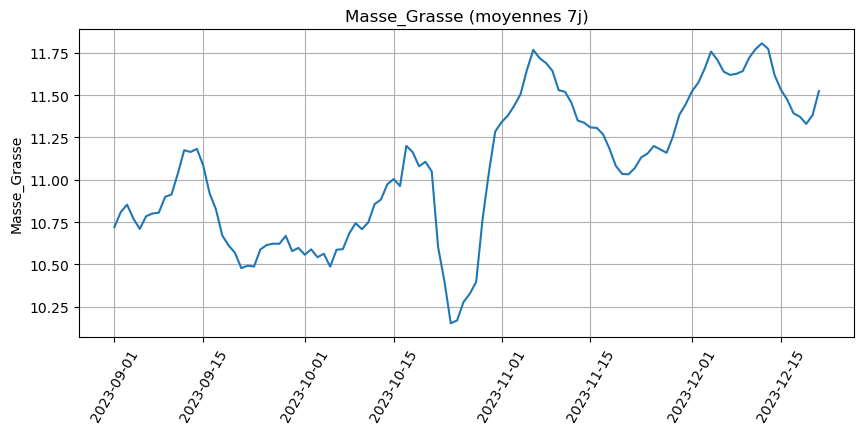

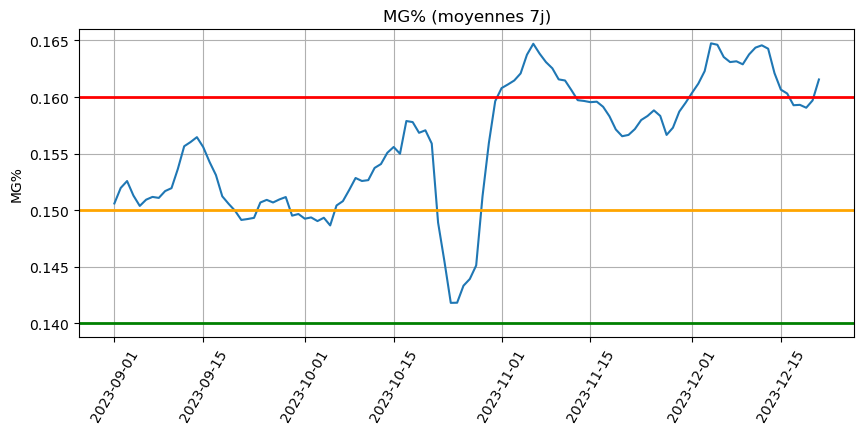

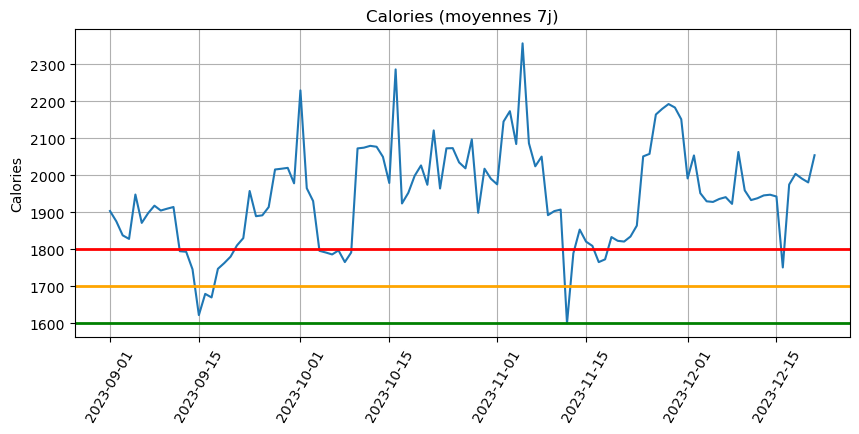

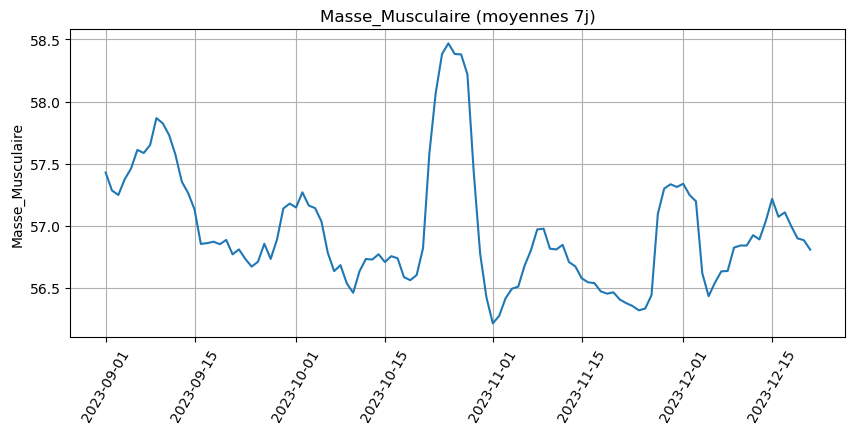

In [90]:
plot_general(longueur=7)

In [91]:
vars = ['Masse_Grasse', 'MG%', 'Calories','Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire',  'cal_deficit', 

ipywidgets.interact(plot_general, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1))

interactive(children=(IntSlider(value=15, description='longueur', max=90, min=1, step=7), IntSlider(value=2023…

<function __main__.plot_general(longueur=15, year=2023, month=9, day=1)>

In [92]:
def plot_general2(longueur=15,
                 year=2023,
                 month=9,
                 day=1,
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='.', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.14, top=0.17)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['cal_deficit']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='.', color='blue', label='cal_deficit')
    ax2.set_ylabel('cal_deficit')
    ax2.set_ylim(bottom=-400.0, top=500.0)
    # ax2.legend()

In [93]:
# ipywidgets.interact(plot_general2, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

In [94]:
def plot_general3(longueur=15,
                 year=2023,
                 month=9,
                 day=1
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='.', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.14, top=0.17)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['Calories']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='.', color='blue', label='cal_deficit')
    ax2.set_ylabel('Calories')
    ax2.set_ylim(bottom=1500.0, top=2500.0)
    # ax2.legend()

In [95]:
ipywidgets.interact(plot_general3, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

interactive(children=(IntSlider(value=15, description='longueur', max=90, min=1, step=7), IntSlider(value=2023…

<function __main__.plot_general3(longueur=15, year=2023, month=9, day=1)>

In [96]:
def scatter_plot(mass_interval=2.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_Masse_Totale'] = (df_corr['Masse_Totale'] - df_corr['Masse_Totale'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['cal_deficit'].to_numpy()
    delta = df_corr['Delta_Masse_Totale'].to_numpy()
    
    # print(delta)
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie deficit over {LENGTH} days')
    ax.set_ylabel(f'average weekly weight change (g) over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=-500, stop=500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')
    

In [97]:
# ipywidgets.interact(scatter_plot, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))

In [98]:
def scatter_plot2(mass_interval=2.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_Masse_Totale'] = (df_corr['Masse_Totale'] - df_corr['Masse_Totale'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['Calories'].to_numpy()
    delta = df_corr['Delta_Masse_Totale'].to_numpy()
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie intake over {LENGTH} days')
    ax.set_ylabel(f'average weekly weight variation (g) over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=1500, stop=2500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')

In [99]:
# ipywidgets.interact(scatter_plot2, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))

In [100]:
def scatter_plot3(mass_interval=5.0, length=15):
    """Utility plot to scatter mass_delta over LENGTH vs average cal_deficit over LENGTH"""
    
    MASS_INTERVAL = mass_interval
    LENGTH = int(length)

    current_mass = df_all['Masse_Totale'].iloc[-1]

    df_corr = df_all[(df_all['Masse_Totale'] - current_mass) <= MASS_INTERVAL]
    df_corr = df_corr.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique']).copy()
    
    df_corr = df_corr.rolling(window=LENGTH).mean().dropna().copy()

    df_corr['Delta_MG'] = (df_corr['Masse_Grasse'] - df_corr['Masse_Grasse'].shift(periods=LENGTH))/LENGTH*7

    df_corr.dropna(inplace=True)
    
    fig, ax = plt.subplots() #figsize=(8,8))
    cal = df_corr['Calories'].to_numpy()
    delta = df_corr['Delta_MG'].to_numpy()
    
    ax.scatter(x=cal, y=delta)
    ax.set_xlabel(f'average calorie intake over {LENGTH} days')
    ax.set_ylabel(f'average weekly fat mass variation over {LENGTH} days')
    ax.grid()
    
    lr = LinearRegression()
    lr.fit(cal.reshape(-1,1), delta)
    x_cal = np.linspace(start=1500, stop=2500, num=100)
    y_pred = lr.predict(x_cal.reshape(-1,1))
    
    ax.scatter(x_cal, y_pred, color='red', marker='.')

In [101]:
ipywidgets.interact(scatter_plot3, mass_interval=(1.0, 10.0, 0.5), length=(1, 30, 7))

interactive(children=(FloatSlider(value=5.0, description='mass_interval', max=10.0, min=1.0, step=0.5), IntSli…

<function __main__.scatter_plot3(mass_interval=5.0, length=15)>